## Creating the First Model

In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Importing the train dataset
df_train = pd.read_csv('data/train.csv')

In [3]:
# Visualizing this dataset
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# Returning the shape 
df_train.shape

(1460, 81)

In [5]:
# And infos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Starting to Explore the Data

In [6]:
# Visualizing the proportion of null values
(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

- We want to create an initial model to check how much error we are making and then plan how to improve it. To do this:
  - We need to **remove null values**.
  - We will **eliminate text columns**.
  - We will **select some algorithms to test and a method for error evaluation**.


In [7]:
# We can remove columns with more than 10% null values
remove = df_train.columns[df_train.isnull().sum()/df_train.shape[0] > 0.1]
remove

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
# Removing these columns
df_train = df_train.drop(remove,axis=1)

- **We can replace all these null values with -1**
    - It won’t be confused with zero
    - Later, we can easily track the values where we made this adjustment

In [9]:
df_train = df_train.fillna(-1)

In [10]:
# Checking the null values again
(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False).head(3)

Id             0.0
GarageYrBlt    0.0
Fireplaces     0.0
dtype: float64

In [11]:
# Types of columns
df_train.dtypes.value_counts()

object     37
int64      35
float64     2
Name: count, dtype: int64

In [12]:
# Now selecting only the numeric columns.
col_nr = df_train.columns[df_train.dtypes != 'object']
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# and create a new dataframe with only numeric columns
df_train = df_train.loc[:,col_nr]

- This will be our initial dataframe for analysis

## Creating our model

- **Let's split into train and validation**
    - [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
    Since we are working with the training dataset, this is not exactly a train/test split. Therefore, we will differentiate between **test** (the final evaluation dataset) and **validation** (used for model tuning and hyperparameter selection).


In [14]:
# Selecting X and y
X = df_train.drop('SalePrice',axis=1)
y = df_train.SalePrice

In [15]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [16]:
# Splitting the dataset into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

- **The next step is to select the algorithms we will use. We can start with the simpler algorithms, such as:**
    - [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    - [Decision Tree Regressor](https://scikit-learn.org/stable/modules/tree.html#regression)
    - [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)


In [17]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [18]:
# Creating the regressor and fitting it with the training data
reg_lr = LinearRegression().fit(X_train, y_train)

In [19]:
# Making the prediction for the validation data
y_pred_lr = reg_lr.predict(X_val)

In [20]:
# Importing Decision Tree Regressor
from sklearn import tree

In [21]:
# Creating the regressor and fitting it with the training data
reg_dt = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [22]:
# Making the prediction
y_pred_dt = reg_dt.predict(X_val)

In [23]:
# Importing o KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
# Creating the regressor and fitting it with the training data
reg_kn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [25]:
# Making the prediction
y_pred_kn = reg_kn.predict(X_val)

- **And evaluate these data, using both absolute and squared errors:**
    - [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
    - [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


In [26]:
# Importing mean absolute error
from sklearn.metrics import mean_absolute_error

In [27]:
# and mean squared error
from sklearn.metrics import mean_squared_error

In [28]:
# Evaluating the Linear Regression error
print(f"Mean Absolute Error (Linear Regression): {mean_absolute_error(y_val, y_pred_lr)}")
print(f"Mean Squared Error (Linear Regression): {mean_squared_error(y_val, y_pred_lr)}")

Mean Absolute Error (Linear Regression): 23763.187393064505
Mean Squared Error (Linear Regression): 1533982883.4448867


In [29]:
# Decision Tree
print(f'Mean Absolute Error (Decision Tree): {mean_absolute_error(y_val, y_pred_dt)}')
print(f'Mean Squared Error (Decision Tree): {mean_squared_error(y_val, y_pred_dt)}')

Mean Absolute Error (Decision Tree): 27911.37966804979
Mean Squared Error (Decision Tree): 2061529316.3423235


In [30]:
# KNeighbors
print(f'Mean Absolute Error (KNeighbors): {mean_absolute_error(y_val, y_pred_kn)}')
print(f'Mean Squared Error (KNeighbors): {mean_squared_error(y_val, y_pred_kn)}')

Mean Absolute Error (KNeighbors): 33273.08298755187
Mean Squared Error (KNeighbors): 2733937586.841286


- **We can visually plot the relationship between y_test and the predictions made**
    - To do this, we will use [matplotlib](https://matplotlib.org/)

In [31]:
# Importing matplotlib
import matplotlib.pyplot as plt

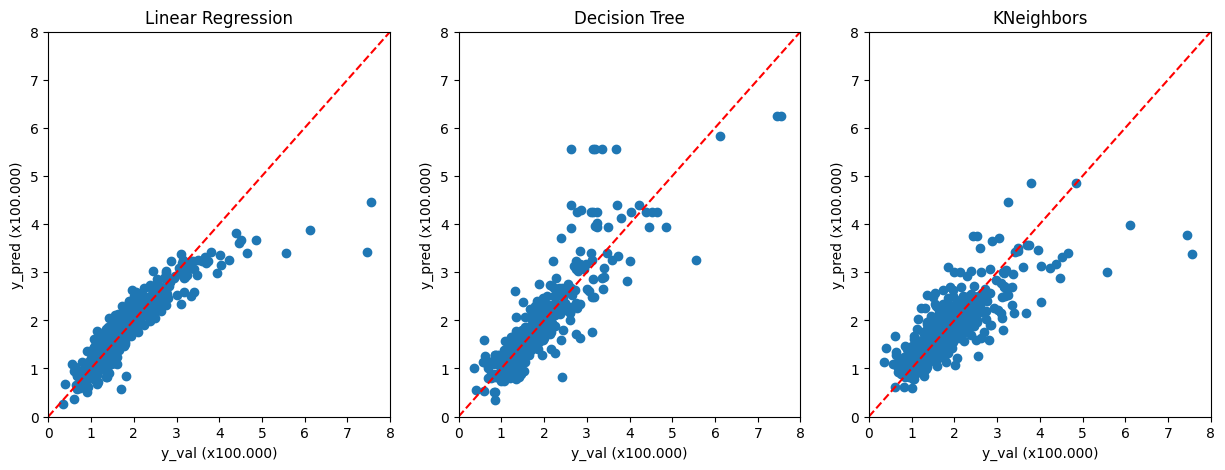

In [ ]:
# Creating the graph

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_val/100000, y_pred_lr/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_val/100000, y_pred_dt/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_val/100000, y_pred_kn/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_val (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Linear Regression')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_val (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Decision Tree')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_val (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNeighbors')

plt.show()

- **We will use Linear Regression because it was the algorithm with the lowest mean squared error, the same metric evaluated by Kaggle when ranking the models**

## Making the prediction for the competition test dataset

In [33]:
# Importing the test dataset
df_test = pd.read_csv('data/test.csv')

In [34]:
# Visualizing the dataset
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


- **Now let's repeat the same preprocessing steps we applied to the training dataset**
    - Note: **we cannot exclude any rows**

In [35]:
# Removing the same columns as in the training dataset
df_test = df_test.drop(remove, axis=1)

In [36]:
# Verifying the numeric columns
col_nr_test = df_test.columns[df_test.dtypes != "object"]
col_nr_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [37]:
# Keeping only the numeric columns as well
df_test = df_test.loc[:,col_nr_test]

In [38]:
# Checking the remaining dataset
df_test.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [39]:
# Visualizing the number of null values
df_test.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

- **We can replace all these null values with -1**
    - It won’t be confused with zero
    - Later, we can easily track the values where we made this adjustment


In [40]:
df_test = df_test.fillna(-1)

In [41]:
# Visualizing the number of null values
df_test.isnull().sum().sort_values(ascending=False).head(10)

Id              0
MSSubClass      0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
dtype: int64

- **Now we can use our model and adjust the data for use in Kaggle**

In [42]:
# We will use Linear Regression to make the prediction
y_pred = reg_lr.predict(df_test)

In [43]:
# We can add this prediction column to our dataset
df_test['SalePrice'] = y_pred

In [44]:
# And extract only the Id and SalePrice
df_kaggle = df_test[['Id', 'SalePrice']]

In [45]:
# We can then export this dataset
df_kaggle.to_csv('results1.csv', index=False)